# Regresion Iterativa 

In [8]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('regLin.csv')

In [10]:
df.head()

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144


In [11]:
 X_train, X_test, Y_train, Y_test = train_test_split(df[['X']],df[['y']], train_size=0.75)

In [12]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)
X_scaler_p = preprocessing.StandardScaler().fit(X_test)
Y_scaler_p = preprocessing.StandardScaler().fit(Y_test)

In [13]:
Xscaler = X_scaler.transform(X_train)
Yscaler = Y_scaler.transform(Y_train)
Xscaler_p = X_scaler_p.transform(X_test)
Yscaler_p = Y_scaler_p.transform(Y_test)

In [14]:
Xscaler = pd.DataFrame(Xscaler)
Yscaler = pd.DataFrame(Yscaler)
Xscaler_p = pd.DataFrame(Xscaler_p)
Yscaler_p = pd.DataFrame(Yscaler_p)

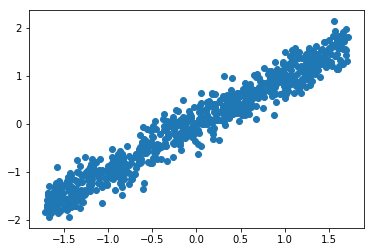

In [15]:
plt.scatter(Xscaler, Yscaler)

In [16]:
linReg=LinearRegression()
linReg.fit(Xscaler, Yscaler)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print linReg.intercept_, linReg.coef_[0]

[  8.96519872e-17] [ 0.9732749]


Obtenemos el vector de V^

In [18]:
pred=linReg.predict(Xscaler)

In [19]:
pred

array([[-0.78132132],
       [ 0.1734135 ],
       [-1.43185176],
       [-0.746562  ],
       [ 1.00875738],
       [ 0.50060427],
       [ 0.69983192],
       [ 0.84492054],
       [-0.23429841],
       [-0.03203385],
       [-1.15028352],
       [ 1.53955457],
       [ 0.51806152],
       [-0.10037324],
       [ 0.736487  ],
       [ 1.26965884],
       [-1.07901339],
       [-0.0146559 ],
       [-1.58990178],
       [-0.90163942],
       [ 0.68781976],
       [ 0.46114146],
       [ 0.95644458],
       [ 0.15494807],
       [-0.22069331],
       [ 0.10200435],
       [-0.35641734],
       [-0.72204879],
       [-1.24645698],
       [-0.23543823],
       [ 0.97125654],
       [-1.23910074],
       [-0.24331665],
       [-0.82768196],
       [ 0.80278372],
       [-1.11096515],
       [ 1.22964712],
       [-0.21070167],
       [ 0.6785547 ],
       [-1.27727521],
       [ 0.47104766],
       [-1.64019137],
       [-1.61629381],
       [ 1.30892373],
       [-1.46229681],
       [-1

Obtenemos el error del modelo

In [20]:
np.mean((pred-Yscaler)**2)

0    0.052736
dtype: float64

Hacemos la primera iteración del error de manera manual y usando eta=0.05

In [27]:
#calculamos una serie de valores para wo y w1
w0 = linReg.intercept_
w1 = linReg.coef_[0]

In [30]:
w0

array([  8.96519872e-17])

Generamos los nuevos parametros w0 y w1, usando la regla wi <---wi + n(y-V^(X))xi

In [32]:
w0_g=w0+(0.5*(Yscaler-pred)*Xscaler)
w1_g=w1+(0.5*(Yscaler-pred)*Xscaler)

Calculamos la nueva V^(X) con los nuevos parámetros

In [33]:
v_x1=w0_g+(w1_g*Xscaler)

Calculamos el nuevo error y lo comparamos con el anterior

In [35]:
np.mean((Yscaler-pred)**2)

0    0.052736
dtype: float64

In [36]:
np.mean((Yscaler-v_x1)**2)

0    0.037398
dtype: float64

Podemos observar que el nuevo error es menor. Para poder hacer mpas iteraciones tenemos que buscar una manera de que lo procese a manera de loop y se detenga después de un cierto numero de iteraciones

Generamos una función que calcule la wo

In [56]:
np.mean((salida(w0, w1, Xscaler)-Yscaler)**2)

0    0.057241
dtype: float64

In [53]:
def salida (w0, W, X1):
    V_X = w0
    V_X = V_X + (W* X1)
    return V_X

In [69]:
def entrena (w0, W, X, Y, nu):
    for i in range (len(X)):
        X1 = X.iloc[i]
        sal = salida(w0, W, X1)
        error=Y.iloc[i] - sal
        w0 = w0 + (nu*error)
        W = W + (nu*error*X.iloc[i])
    return w0,W    

In [71]:
ent=entrena(w0,w1, Xscaler, Yscaler,0.5)

Calculamos el nuevo v_x con los nuevos parametros

In [77]:
v_x_it=ent[0]+(ent[1]*Xscaler)

Calculamos el nuevo error

In [78]:
np.mean((Yscaler-v_x_it)**2)

0    0.069193
dtype: float64